In [4]:
# Here we look at the nature of the topo domain and also plot and visaulize the hydrograph

%matplotlib notebook
%pylab
import pandas as pd
import rasterio
%matplotlib inline

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
topofile_10 = 'scratch/topo/harvey_10m.dem'
topofile_30 = 'scratch/topo/harvey_30m.dem'

num_sources = 69  # number of inflow locations
hydrograph_file_10 = 'scratch/hydrograph/hydro_10m.hyg'
hydrograph_file_30 = 'scratch/hydrograph/hydro_30m.hyg'
src_loc_file_10    = 'scratch/hydrograph/src_loc_10m.txt'
src_loc_file_30    = 'scratch/hydrograph/src_loc_30m.txt' # contains all the flow locations

<Figure size 432x288 with 0 Axes>

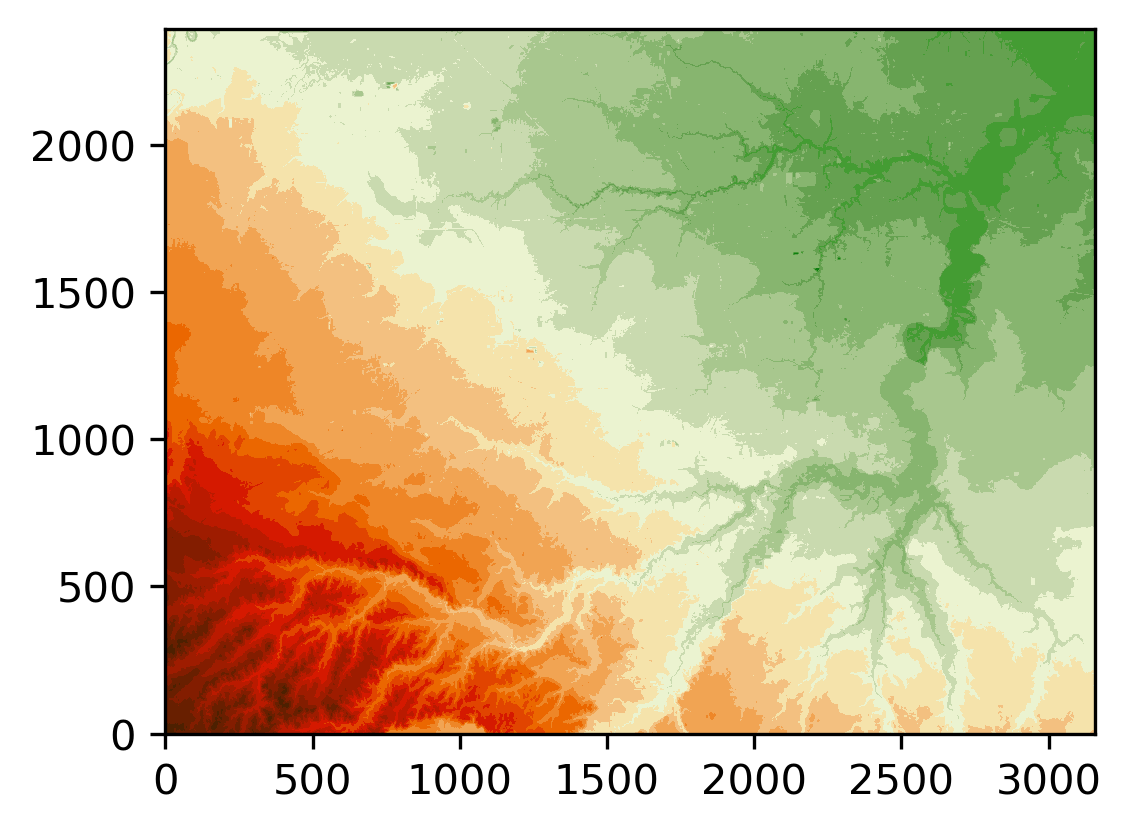

In [29]:
# plot the topo domain
file_path = topofile_30

# open the file using rasterio
with rasterio.open(file_path) as src:
    # read the data
    data = src.read(1)
    # get the metadata
    meta = src.meta
    # get the bounds
    bounds = src.bounds
    # get the resolution
    res = src.res
    # get the number of rows and columns
    rows, cols = data.shape
    # get the geotransform
    transform = src.transform

figure(6)
import matplotlib.colors as mcolors
# Define the "terrain" colormap
terrain_cmap = mcolors.ListedColormap([
    "#0E7D11", "#449C33", "#65A150", "#87B56F", "#A8C78E",
    "#C9DAAF", "#EBF3D0", "#F5E3AB", "#F3C080", "#F1A453",
    "#EE8627", "#EB6700", "#E14400", "#D51900", "#BA1A00",
    "#9E1C00", "#831D00", "#681F00", "#4D2000"])


figure(figsize=(4, 4), dpi=300)
imshow(data, cmap=terrain_cmap)

# remove axis ticks
ax = gca()
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
#  remve axis labels
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])

#  remove the frame
# ax.set_frame_on(False)

# insert a minor grid
# ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

#  invert the y axis
gca().invert_yaxis()

# add a colorbar with the same dimensions as the plot
# colorbar(shrink=0.8,label = 'Elevation (m)')
savefig('Test1DEM.png')
# show()

# plot the sources on the topo domain
# figure(7)



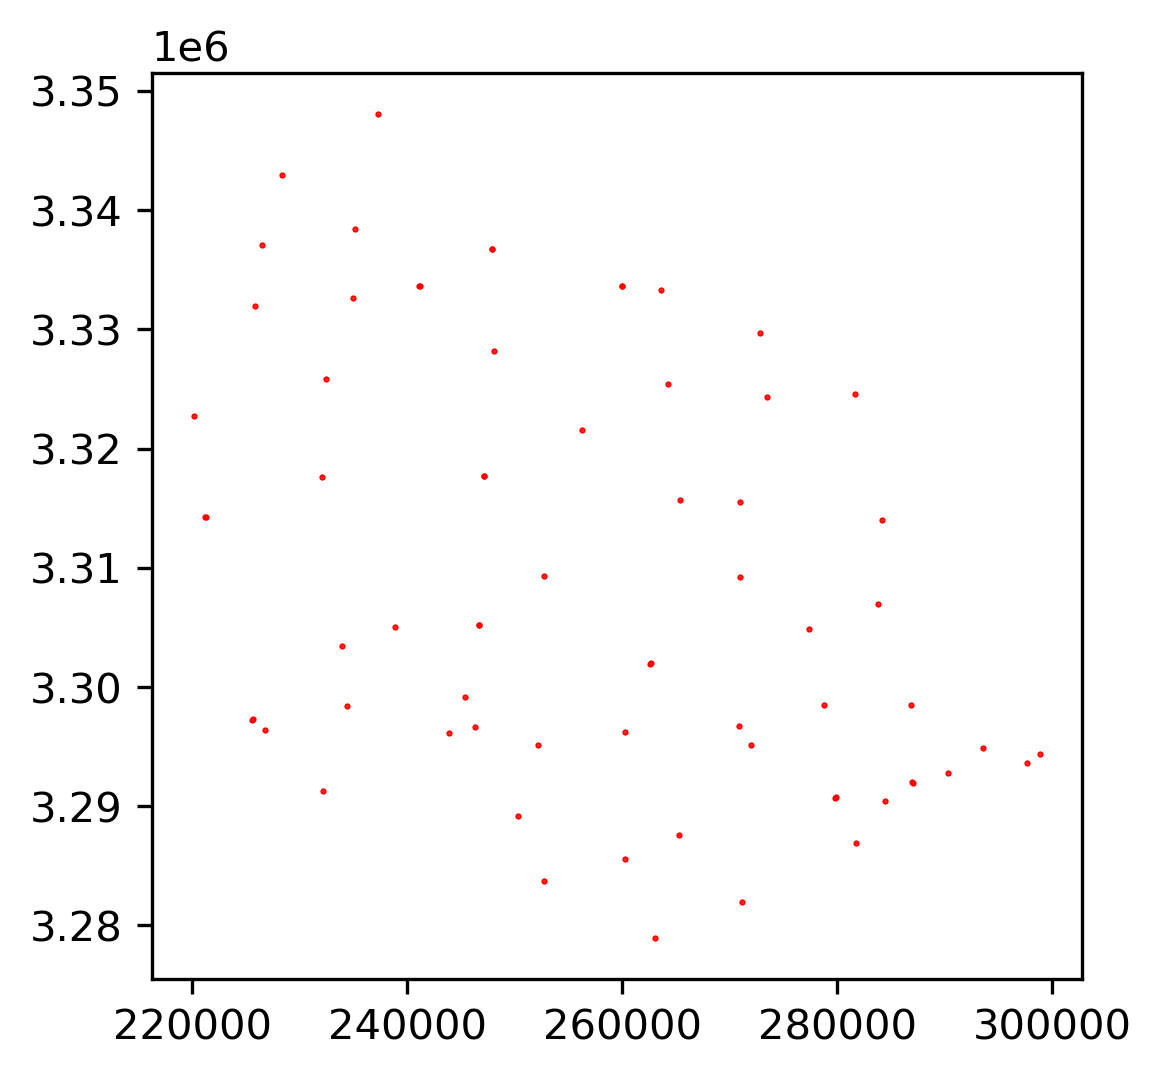

In [28]:
src = pd.read_csv(src_loc_file_30)
src.columns = ['x', 'y']

# plot (x,y) locations of the sources on top of the topo domain
figure(figsize=(4, 4), dpi=300)
# imshow(data, cmap=terrain_cmap)
plot(src.x, src.y, 'r.', markersize=1)
show()

In [32]:
src = pd.read_csv(src_loc_file_30)
src.columns = ['x', 'y']

#  Calculate the chanel length between each source
def chanel_length(src):
    # calculate the distance between each source
    src['x_shift'] = src.x.shift(1)
    src['y_shift'] = src.y.shift(1)
    src['dx'] = src.x - src.x_shift
    src['dy'] = src.y - src.y_shift
    src['ds'] = np.sqrt(src.dx ** 2 + src.dy ** 2)
    # calculate the cumulative distance
    src['s'] = src.ds.cumsum()
    return src

,x,y
0,237310.4818,3348054.081
1,247901.4810,3336746.834
2,228402.4579,3342903.578
3,235152.5122,3338392.242
4,241149.4311,3333652.196
...,...,...
64,286850.7607,3298451.815
65,290295.3863,3292782.159
66,297631.2903,3293595.690
67,293584.2111,3294878.101


In [33]:
src.x.shift(1)

0             NaN
1     237310.4818
2     247901.4810
3     228402.4579
4     235152.5122
         ...     
64    277400.7004
65    286850.7607
66    290295.3863
67    297631.2903
68    293584.2111
Name: x, Length: 69, dtype: float64

In [34]:
 src.x

0     237310.4818
1     247901.4810
2     228402.4579
3     235152.5122
4     241149.4311
         ...     
64    286850.7607
65    290295.3863
66    297631.2903
67    293584.2111
68    298821.0171
Name: x, Length: 69, dtype: float64